**Claimer: There are many different metrics to evaluate the performance of a clustering algorithm. The optimal numbers of clusters determined by these metrics might be different by a very small number, i.e., 1 or 2, but in general, these metrics confirm each other. For example, an algorithm that yields a high silhouette score will yield a low Daives Bouldin Score. Hence, I am only going to use the Silhouette score here.**

In [1]:
import pandas as pd
url="https://bd29ee0e-54ab-4daa-9671-d153865d1620.usrfiles.com/ugd/bd29ee_80914d7a05904fe1ad56582a8d67f246.csv"
df=pd.read_csv(url,header=None)
df.head()

,0,1,2
0,0,0,1
1,0,284,1
2,0,345,1
3,0,421,1
4,0,3964,1


The data is in COO matrix format. That means column 0 contains the row numbers, column 1 contains the column numbers and column 2 contains the values. 

Convert the COO matrix to pandas data frame.

In [2]:
import numpy as np
from scipy.sparse import coo_matrix
row=np.asarray(df.iloc[:,0])
column=np.asarray(df.iloc[:,1])
data=np.asarray(df.iloc[:,2])

In [3]:
coo=coo_matrix((data, (row, column))).toarray()
coo

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [4]:
df=pd.DataFrame(coo)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11337,11338,11339,11340,11341,11342,11343,11344,11345,11346
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,11,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,10,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,19,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.shape

(13559, 11347)

The task is clustering. As shown, the datasete has 11,347 attributes. A clustering task with that many attributes is meaningless. 

Use IncrementalPCA to reduce the dimension to 10.

In [6]:
from sklearn.decomposition import IncrementalPCA

n_components=10
transformer = IncrementalPCA(n_components=n_components,whiten=True, batch_size=200)
df=pd.DataFrame(transformer.fit_transform(df))
df.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.009120,-0.014297,-0.008448,-0.008492,-0.008390,-0.008299,-0.008395,-0.014522,-0.008335,-0.005581
1,-0.009188,-0.014484,-0.008931,-0.008893,-0.009145,-0.009277,-0.009135,-0.017282,-0.013324,-0.015803
2,-0.009261,-0.014689,-0.009467,-0.009231,-0.009985,-0.010313,-0.009936,-0.020741,-0.018690,-0.027070
3,-0.009121,-0.014300,-0.008454,-0.008499,-0.008400,-0.008358,-0.008407,-0.014547,-0.008354,-0.005753
4,-0.009120,-0.014295,-0.008445,-0.008489,-0.008385,-0.008341,-0.008389,-0.014508,-0.008321,-0.005701


In [7]:
df.shape

(13559, 10)

In [8]:
import numpy as np
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


n_clusters=np.arange(2,21)
silhouette=[]
for n_clusters in n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(df)
    silhouette_avg = silhouette_score(df, cluster_labels,metric='euclidean')
    print("For n_clusters =", n_clusters,
          " ,the average silhouette_score is :", silhouette_avg,)
    silhouette.append(silhouette_avg)

For n_clusters = 2  ,the average silhouette_score is : 0.998530826004332
For n_clusters = 3  ,the average silhouette_score is : 0.9985828970837699
For n_clusters = 4  ,the average silhouette_score is : 0.9986349759955215
For n_clusters = 5  ,the average silhouette_score is : 0.9986870626427595
For n_clusters = 6  ,the average silhouette_score is : 0.9987390943539093
For n_clusters = 7  ,the average silhouette_score is : 0.9987912039394923
For n_clusters = 8  ,the average silhouette_score is : 0.9988430051295847
For n_clusters = 9  ,the average silhouette_score is : 0.998894090873627
For n_clusters = 10  ,the average silhouette_score is : 0.9989388002077398
For n_clusters = 11  ,the average silhouette_score is : 0.9989833504107337
For n_clusters = 12  ,the average silhouette_score is : 0.9967609961599749
For n_clusters = 13  ,the average silhouette_score is : 0.9958752228438815
For n_clusters = 14  ,the average silhouette_score is : 0.995946610402437
For n_clusters = 15  ,the average si

Text(0, 0.5, 'Silhouette scores')

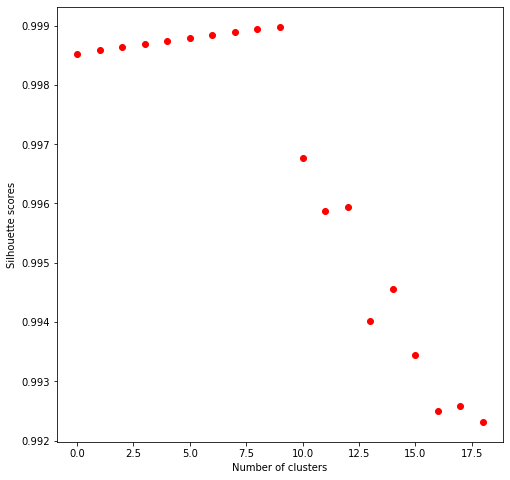

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.plot(silhouette, 'ro')
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette scores")

It seems that from 2 clusters to 20 clusters, no matter what number we pick, the silhouette score would be close to 1. It peaks at N=11.

Let's validate that on the validation data.

In [10]:
url="https://bd29ee0e-54ab-4daa-9671-d153865d1620.usrfiles.com/ugd/bd29ee_82cef6e2e568402982025f7b5086440b.csv"
validation=pd.read_csv(url,header=None)
validation.head()

,0,1,2
0,1,1,1
1,1,182,2
2,1,443,1
3,1,1243,1
4,1,1452,1


In [11]:
row=np.asarray(validation.iloc[:,0])
column=np.asarray(validation.iloc[:,1])
data=np.asarray(validation.iloc[:,2])
coo=coo_matrix((data, (row, column))).toarray()
coo

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [12]:
validation=pd.DataFrame(coo)
validation.head()

,0,1,2,3,4,5,6,7,8,9,...,11337,11338,11339,11340,11341,11342,11343,11344,11345,11346
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
validation.shape

(13559, 11347)

In [14]:
n_components=10
transformer = IncrementalPCA(n_components=n_components,whiten=True, batch_size=200)
validation=pd.DataFrame(transformer.fit_transform(validation))
validation.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.008550,-0.009321,-0.008567,-0.018091,-0.008507,-0.008536,-0.008140,-0.173709,-0.009613,-0.008860
1,-0.008552,-0.009324,-0.008570,-0.018099,-0.008514,-0.008548,-0.008155,-0.174161,-0.009742,-0.009086
2,-0.008637,-0.009442,-0.008681,-0.018421,-0.008756,-0.009099,-0.008850,-0.139653,-0.011625,-0.011869
3,-0.008591,-0.009377,-0.008621,-0.018245,-0.008620,-0.008793,-0.008450,-0.174851,-0.010503,-0.009984
4,-0.008550,-0.009321,-0.008567,-0.018091,-0.008507,-0.008536,-0.008141,-0.173714,-0.009613,-0.008860


In [15]:
validation.shape

(13559, 10)

In [16]:
n_clusters=np.arange(2,21)
silhouette=[]
for n_clusters in n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(validation)
    silhouette_avg = silhouette_score(validation, cluster_labels,metric='euclidean')
    print("For n_clusters =", n_clusters,
          " ,the average silhouette_score is :", silhouette_avg,)
    silhouette.append(silhouette_avg)

For n_clusters = 2  ,the average silhouette_score is : 0.9959387971723399
For n_clusters = 3  ,the average silhouette_score is : 0.9959906773604055
For n_clusters = 4  ,the average silhouette_score is : 0.9960425515042804
For n_clusters = 5  ,the average silhouette_score is : 0.9960944204520579
For n_clusters = 6  ,the average silhouette_score is : 0.9961463300664268
For n_clusters = 7  ,the average silhouette_score is : 0.996198228574285
For n_clusters = 8  ,the average silhouette_score is : 0.9962489368028655
For n_clusters = 9  ,the average silhouette_score is : 0.9963002563239
For n_clusters = 10  ,the average silhouette_score is : 0.9962066987865656
For n_clusters = 11  ,the average silhouette_score is : 0.9650498382692841
For n_clusters = 12  ,the average silhouette_score is : 0.9459980833530263
For n_clusters = 13  ,the average silhouette_score is : 0.9218927662670371
For n_clusters = 14  ,the average silhouette_score is : 0.9252533654410519
For n_clusters = 15  ,the average sil

Text(0, 0.5, 'Silhouette scores')

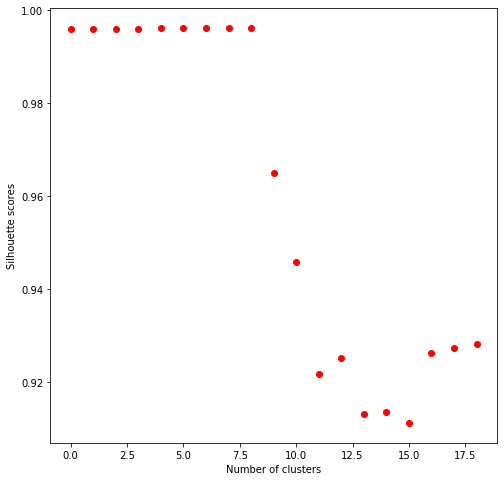

In [17]:
plt.figure(figsize=(8,8))
plt.plot(silhouette, 'ro')
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette scores")

For the validation data, for N equal to or smaller than 10, silhouette score will be close to 1, but it peaks at N=9.

Let's test it on the test data.

In [3]:
import pandas as pd
url="https://bd29ee0e-54ab-4daa-9671-d153865d1620.usrfiles.com/ugd/bd29ee_93967d72bd6e467ea0a2308139b70b04.csv"
test=pd.read_csv(url,header=None)
test.head()

,0,1,2
0,1,1287,2
1,1,1352,1
2,1,6948,1
3,1,8709,1
4,1,9894,1


In [4]:
import numpy as np
from scipy.sparse import coo_matrix
row=np.asarray(test.iloc[:,0])
column=np.asarray(test.iloc[:,1])
data=np.asarray(test.iloc[:,2])
coo=coo_matrix((data, (row, column))).toarray()
coo

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [5]:
test=pd.DataFrame(coo)
test.head()

,0,1,2,3,4,5,6,7,8,9,...,11337,11338,11339,11340,11341,11342,11343,11344,11345,11346
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test.shape

(13559, 11347)

In [8]:
from sklearn.decomposition import IncrementalPCA
n_components=10
transformer = IncrementalPCA(n_components=n_components,whiten=True, batch_size=200)
test=pd.DataFrame(transformer.fit_transform(test))
test.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.008581,-0.008434,0.024287,-0.124305,-0.013024,-0.010234,-0.009133,-0.008769,-0.008109,-0.009704
1,-0.008583,-0.008464,0.024441,-0.125156,-0.013125,-0.010304,-0.009233,-0.008908,-0.008588,-0.010269
2,-0.008615,-0.008860,0.025153,-0.133309,-0.014175,-0.011231,-0.010248,-0.010869,-0.011046,-0.013601
3,-0.008590,-0.008544,0.024260,-0.126015,-0.013314,-0.010495,-0.009435,-0.009350,-0.008931,-0.010675
4,-0.008581,-0.008435,0.024291,-0.124323,-0.013026,-0.010236,-0.009135,-0.008773,-0.008114,-0.009709


In [10]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_clusters=np.arange(2,21)
silhouette=[]
for n_clusters in n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(test)
    silhouette_avg = silhouette_score(test, cluster_labels,metric='euclidean')
    print("For n_clusters =", n_clusters,
          " ,the average silhouette_score is :", silhouette_avg,)
    silhouette.append(silhouette_avg)

For n_clusters = 2  ,the average silhouette_score is : 0.9964895918257768
For n_clusters = 3  ,the average silhouette_score is : 0.9965415114665822
For n_clusters = 4  ,the average silhouette_score is : 0.9965934391317414
For n_clusters = 5  ,the average silhouette_score is : 0.9966453700260015
For n_clusters = 6  ,the average silhouette_score is : 0.9966972305251254
For n_clusters = 7  ,the average silhouette_score is : 0.9967491841971161
For n_clusters = 8  ,the average silhouette_score is : 0.9968010166196589
For n_clusters = 9  ,the average silhouette_score is : 0.9968526374165547
For n_clusters = 10  ,the average silhouette_score is : 0.9912671119065878
For n_clusters = 11  ,the average silhouette_score is : 0.9783133474487797
For n_clusters = 12  ,the average silhouette_score is : 0.9800453762279221
For n_clusters = 13  ,the average silhouette_score is : 0.9734284563380178
For n_clusters = 14  ,the average silhouette_score is : 0.9629198167976093
For n_clusters = 15  ,the average

Text(0, 0.5, 'Silhouette scores')

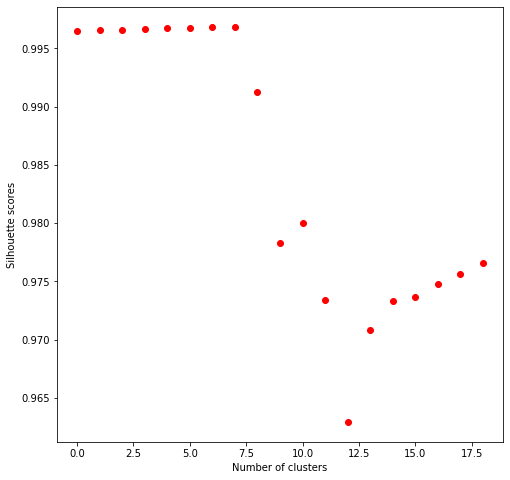

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.plot(silhouette, 'ro')
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette scores")

For the test data, N equal to or smaller than 10 will yield silhouette score close to 1, but it peaks at N=9.

**After reducing the dimension from 11,347 to 10 with IncrementalPCA, the optimal number of clusters is 9. On all three sets of data (train, validation, test), N=9 yields a silhouette score that is almost 1.** 

The number of components and batch size for the IncrementalPCA algorithm will affect the reduced-dimension dataset, which will in turn affect the result of the clustering algorithm. It is a chain reaction. It seems that this is a too easy clustering task, or maybe my intuition was at an optimal level that for the IncrementalPCA algorithm, I picked the optimal number of components and batch size. 

For this dataset, the clustering algorithm is almost routine. The trick is to pick the optimal number of components and batch size for the IncrementalPCA algorithm.

### To take it further:

We can take it a step further and turn this into a classification task. Attach the labels assinged by the clustering algorithm to the dataset and it becomes a reasonaly challenging multilabel classification task with 11,347 attributes.